In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [6]:
data.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [8]:
statistics = data.describe()
statistics

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [9]:
data['Engagement Rate'] = (data['Likes'] + data['Comments'] + data['Shares']) / data['Impressions']
data['Conversion Rate'] = data['Follows'] / data['Profile Visits']

engagement_rate_stats = data['Engagement Rate'].describe()
conversion_rate_stats = data['Conversion Rate'].describe()

print("\nEngagement Rate Statistics:")
print(engagement_rate_stats)

print("\nConversion Rate Statistics:")
print(conversion_rate_stats)


Engagement Rate Statistics:
count    119.000000
mean       0.037398
std        0.009099
min        0.012839
25%        0.031462
50%        0.037771
75%        0.042463
max        0.059970
Name: Engagement Rate, dtype: float64

Conversion Rate Statistics:
count    119.000000
mean       0.381852
std        0.329570
min        0.000000
25%        0.190476
50%        0.315789
75%        0.461538
max        2.181818
Name: Conversion Rate, dtype: float64


In [10]:
import seaborn as sns

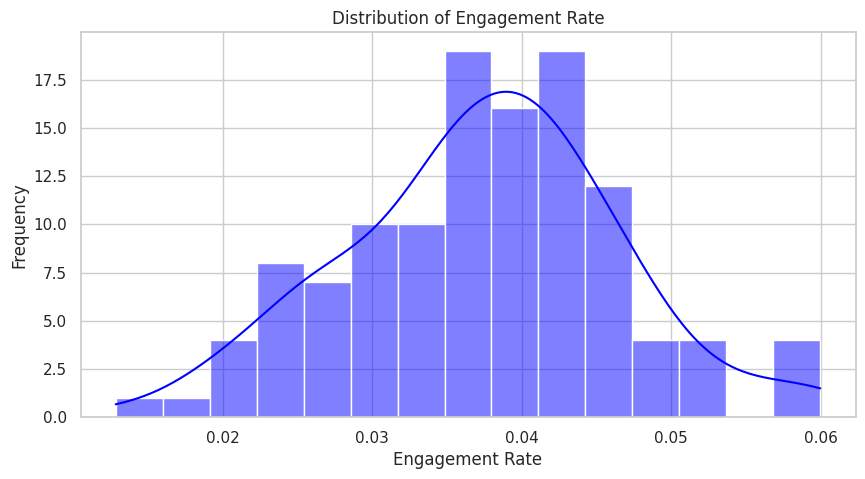

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(data['Engagement Rate'], kde=True, bins=15, color="blue")
plt.title("Distribution of Engagement Rate")
plt.xlabel("Engagement Rate")
plt.ylabel("Frequency")
plt.show()

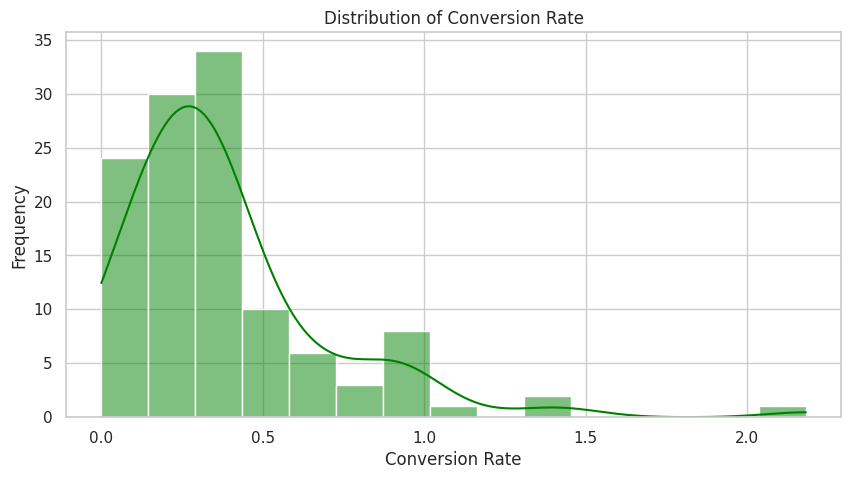

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Conversion Rate'], kde=True, bins=15, color="green")
plt.title("Distribution of Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()


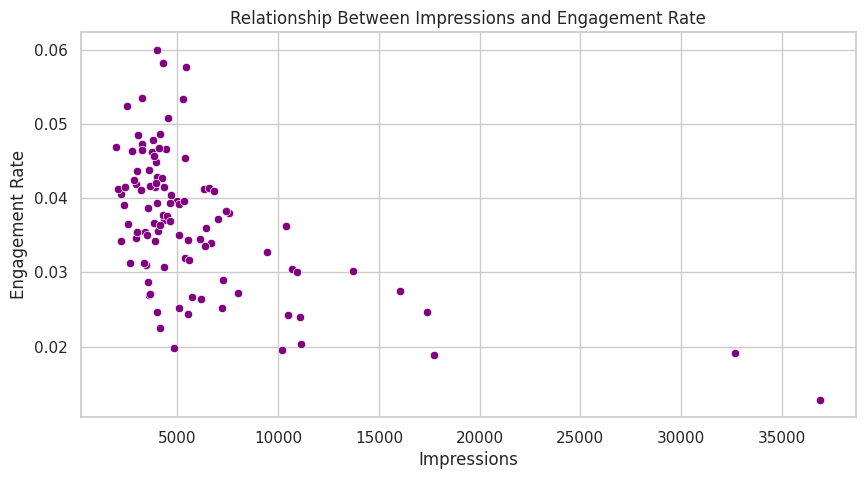

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Impressions', y='Engagement Rate', data=data, color="purple")
plt.title("Relationship Between Impressions and Engagement Rate")
plt.xlabel("Impressions")
plt.ylabel("Engagement Rate")
plt.show()

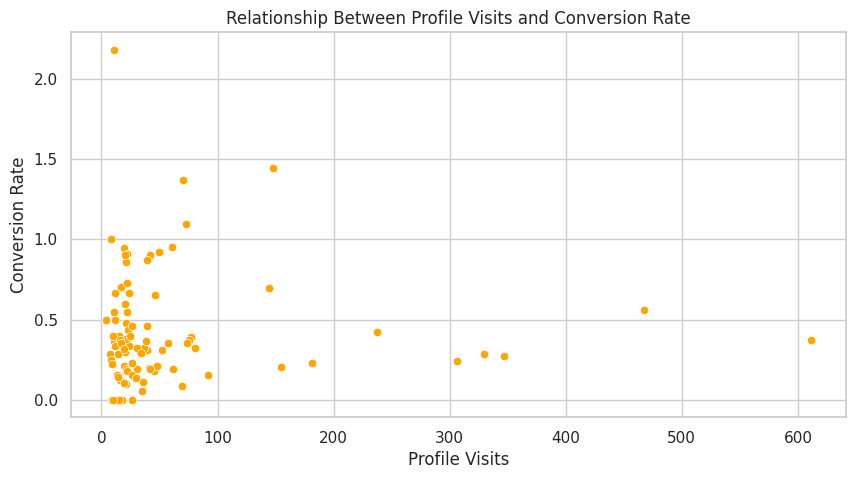

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Profile Visits', y='Conversion Rate', data=data, color="orange")
plt.title("Relationship Between Profile Visits and Conversion Rate")
plt.xlabel("Profile Visits")
plt.ylabel("Conversion Rate")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
X = data[['Likes', 'Comments', 'Shares', 'Saves', 'Profile Visits', 'Follows']]
y = data['Impressions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [19]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R-squared (R²): {r2:.2f}")
    print("-" * 40)

In [20]:
# Evaluate Linear Regression
evaluate_model(y_test, y_pred_linear, "Linear Regression")

# Evaluate Random Forest Regressor
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression Performance:
  Mean Absolute Error (MAE): 1370.85
  Mean Squared Error (MSE): 4746059.12
  R-squared (R²): 0.88
----------------------------------------
Random Forest Regressor Performance:
  Mean Absolute Error (MAE): 1178.88
  Mean Squared Error (MSE): 4664673.99
  R-squared (R²): 0.88
----------------------------------------


In [21]:
feature_importances = rf_model.feature_importances_
features = X.columns

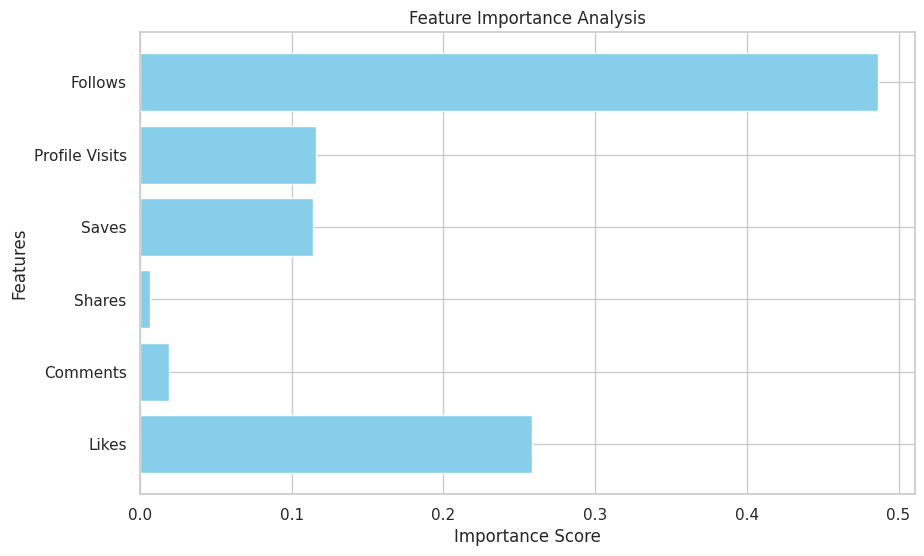

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color="skyblue")
plt.title("Feature Importance Analysis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

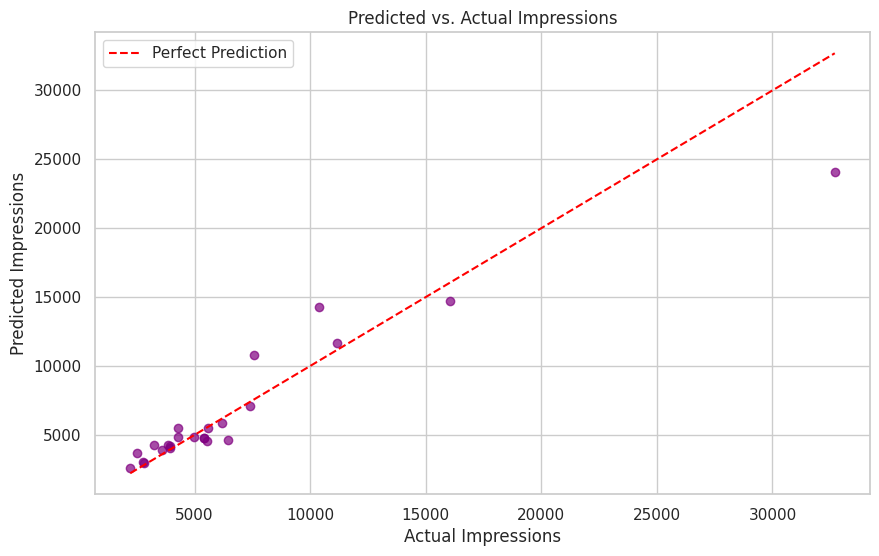

In [23]:
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="purple")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
plt.title("Predicted vs. Actual Impressions")
plt.xlabel("Actual Impressions")
plt.ylabel("Predicted Impressions")
plt.legend()
plt.show()

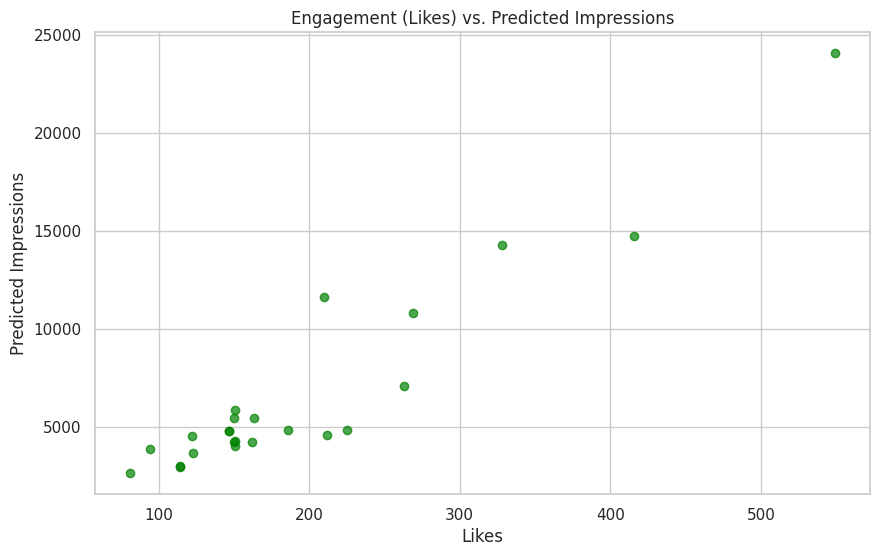

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Likes'], y_pred_rf, alpha=0.7, color="green")
plt.title("Engagement (Likes) vs. Predicted Impressions")
plt.xlabel("Likes")
plt.ylabel("Predicted Impressions")
plt.show()